In [23]:
import polars as pl
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
vix_raw = pl.read_csv("./data/VIX_History.csv")
vix = vix_raw.select(
    [
        pl.col("date").str.strptime(pl.Date, format="%m/%d/%Y"),
        pl.col("close").alias("vix").log(),
    ]
)

In [8]:
x = vix["vix"].to_numpy()
model = sm.tsa.ARIMA(x, order=(1, 1, 1))
results = model.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8399
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10856.724
Date:                Wed, 17 May 2023   AIC                         -21707.449
Time:                        19:34:22   BIC                         -21686.342
Sample:                             0   HQIC                        -21700.242
                               - 8399                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7857      0.017     45.258      0.000       0.752       0.820
ma.L1         -0.8766      0.013    -65.408      0.000      -0.903      -0.850
sigma2         0.0044   3.33e-05    132.293      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):             20954.57
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

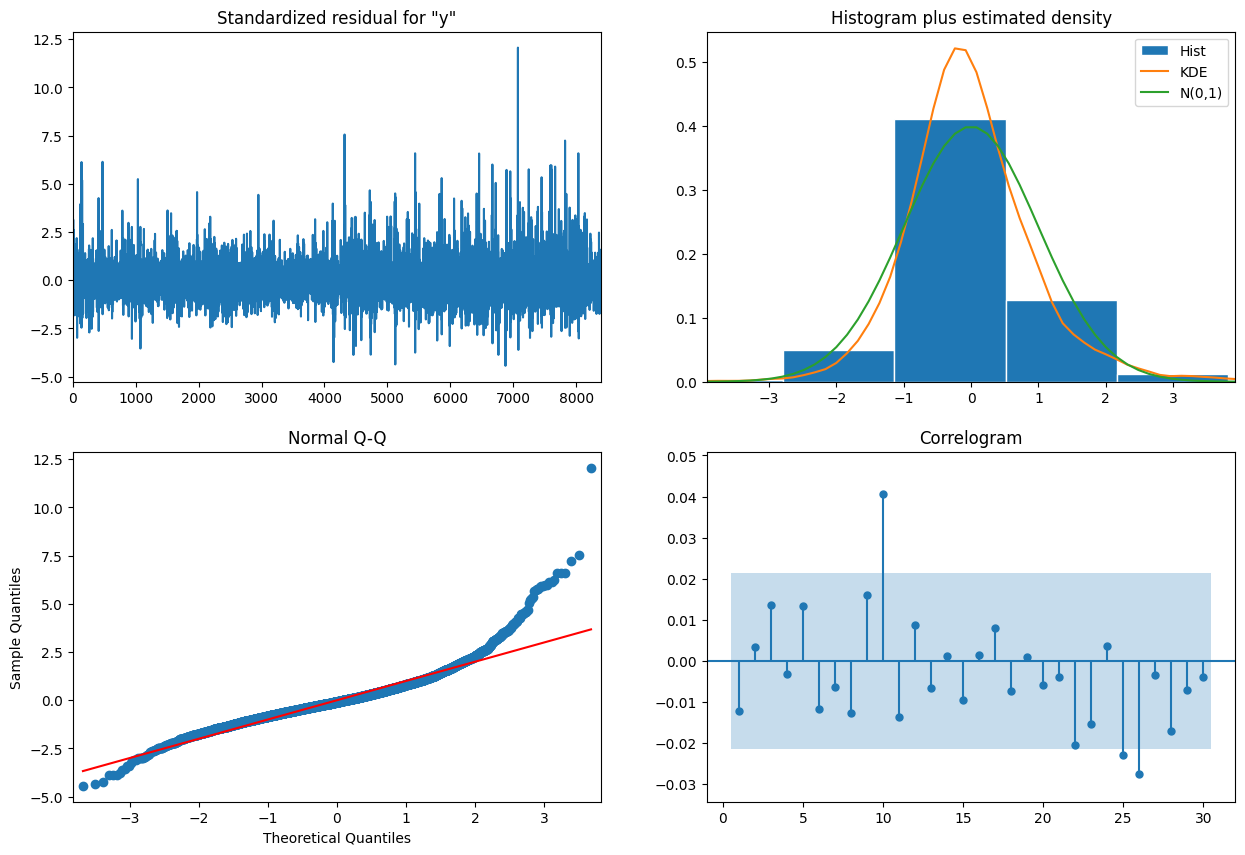

In [20]:
_ = results.plot_diagnostics(
    figsize=(15, 10), lags=30, auto_ylims=True, acf_kwargs={"zero": False}
)

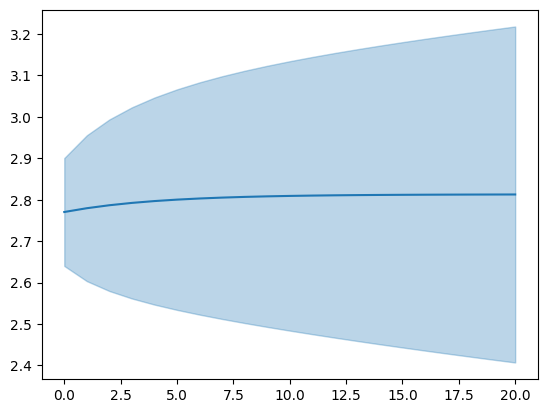

In [56]:
prediction = results.get_forecast(21)
mean = prediction.predicted_mean
conf_int = prediction.conf_int()

plt.plot(x, prediction.predicted_mean)
plt.fill_between(x, conf_ints[:, 0], conf_ints[:, 1], color="C0", alpha=0.3)